# ELE 535 Lab 3 

### Due Date: 10/10 (Mon) 11:59 PM
### Name: 
Step 0) Please go through the computational part of HW2 and finish the PCA parts (Q4 and Q5 of "Singular Value Decomposition" part along with Q7 of "Nearest Neighbor Classifier").
After finishing up, start the following lab. 
Please submit both Jupyter notebooks (LAB2 and LAB3) by Monday (10/10).

# Getting started with Scikit-learn

# 1 -- Iris flowers dataset:

Scikit-learn includes some well-known datasets, one of which is the Iris flowers dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set). It contains 4 attributes (petal length and width, sepal length and width) about Iris flower species ("Setosa", "Versicolor", or "Virginica"). We would like to guess Iris species based on the attribute measures. 


1) importorting required Python packages:

In [108]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline 

2) Importing Iris dataset:

In [109]:
from sklearn import datasets
Iris_data = datasets.load_iris()
data_X = Iris_data.data #Data matrix
data_labels = Iris_data.target #Labels

3) Print the size of data array (data_X). How many labels does exist in the dataset? How many features does each Iris sample have? Hint: You can use X.shape command.

In [379]:
"""
3 different labels: setosa, versicolor, and virginica
each Iris same have 4 features: sepal length, sepal width, petal length, petal width
"""
print data_X.shape


(150L, 4L)


4) Now, split the data into training/test sets using "train_test_split" command in scikit-learn. Consider 80% of the data to be training and the rest as the test data. Hint: "train_test_split" is a class in cross_validation subpackage of scikit_learn.

In [387]:
from sklearn.cross_validation import train_test_split
data_X_train, data_X_test, data_labels_train, data_labels_test = train_test_split(data_X, data_labels, test_size=0.2, random_state=12)
print 'The size of training data is', data_X_train.shape
print 'The size of testing data is', data_X_test.shape

The size of training data is (120L, 4L)
The size of testing data is (30L, 4L)


5) What does "random_state" argument of "train_test_split" class do? Why would it be useful?

In [112]:
"""
random_state Pseudo-random number generator state used for random sampling.
if do not setup the random state, everytime run the program, the result will be different
if we give a random state, everytime, it will give a same train-test split
"""

6) Select only the first two features for training/test data. Then, plot how training/test data are distributed in two dimensions. Use different colors for instances from different classes. Hint: "plt.scatter" will be helpful.

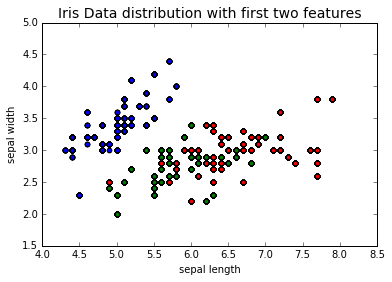

In [389]:
row_X = data_X.shape[0]
col_X = data_X.shape[1]
colors =["b","g","r"]
for i in range(row_X):
    plt.scatter(data_X[i:,0], data_X[i:,1], c = colors[data_labels[i]])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Iris Data distribution with first two features", fontsize=14)

7) Dataset standardization: Scale each feature across training data to have zero mean and unit variance using numpy. (For the training data with 4 features). Hint: You may use np.mean(), and np.std() commands. Make sure that you compute mean across the correct axis.

Afterwards, standardize the test set using the computed training mean and variace.

In [392]:
# define mean and var array to store the mean and std data
# data_X_train, data_X_test, data_labels_train, data_labels_test 
np.mean(data_X_train[:,0])
data_X_train_mean = np.zeros(col_X)
data_X_train_std =  np.zeros(col_X)
data_X_train_scaled = np.zeros((data_X_train.shape[0], data_X_train.shape[1]))
data_X_test_scaled = np.zeros((data_X_test.shape[0], data_X_test.shape[1]))
for i in range(col_X):
    data_X_train_mean[i] = np.mean(data_X_train[:,i])
    data_X_train_std[i] = np.std(data_X_train[:,i])
    data_X_train_scaled[:,i] = (data_X_train[:,i] - data_X_train_mean[i])/data_X_train_std[i]
    data_X_test_scaled[:,i] = (data_X_test[:,i] - data_X_train_mean[i])/data_X_train_std[i]
    
print 'mean of train data = ',np.mean(data_X_train_scaled)
print 'mean of test data = ',np.mean(data_X_test_scaled)
print 'std of train data = ',np.std(data_X_train_scaled)
print 'std of test data = ',np.std(data_X_test_scaled)

mean of train data =  5.18104078158e-17
std of train data =  -0.0489354393043
mean of test data =  1.0
std of test data =  0.984942700237


8) Now, perform dataset standardization using Scikit-learn. Hint: You may find "StandardScalar" class from "preprocessing" sub-package of scikit-learn helpful.

In [393]:
from sklearn import preprocessing

X_Scaler = preprocessing.StandardScaler()
data_X_train_scaled2 = X_Scaler.fit_transform(data_X_train)
data_X_test_scaled2= X_Scaler.transform(data_X_test)

print 'mean of train data = ', np.mean(data_X_train_scaled2)
print 'mean of test data = ', np.mean(data_X_test_scaled2)
print 'std of train data = ', np.std(data_X_train_scaled2)
print 'std of test data = ', np.std(data_X_test_scaled2)

mean of train data =  -1.55431223448e-16
mean of test data =  -0.0489354393043
std of train data =  1.0
std of test data =  0.984942700237


9) PCA with scikit-learn: Project the standardized data (with 4 features) onto the span of the first two principal components. Hint: you may use PCA command from scikit_learn.

In [161]:
from sklearn.decomposition import PCA
PCA_2 = PCA(n_components=2)
PCA_2.fit(data_X_train_scaled)
data_X_train_scaled_PCA2 = PCA_2.transform(data_X_train_scaled)
data_X_test_scaled_PCA2 = PCA_2.transform(data_X_test_scaled)

10) Visualize the projected data in two dimension (use the same colors as the ones used in step 6).

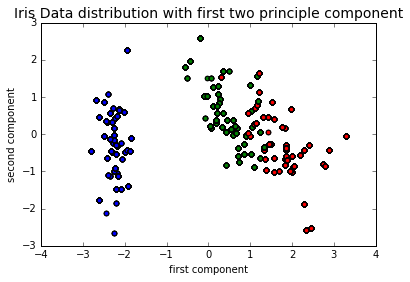

In [395]:
data_X_scaled_PCA2 = np.concatenate((data_X_train_scaled_PCA2,data_X_test_scaled_PCA2), axis = 0)
data_X_labels_PCA2 = np.concatenate((data_labels_train, data_labels_test), axis = 0)
for i in range(row_X):
    plt.scatter(data_X_scaled_PCA2[i:,0], data_X_scaled_PCA2[i:,1], c = colors[data_X_labels_PCA2[i]])
    
plt.xlabel("first component")
plt.ylabel("second component")
plt.title("Iris Data distribution with first two principle components", fontsize=14)

# Implementing different classifiers:

# 1) K-nearest neighbor classifier:

implement k-nearest clasifier using scikit-learn for k=1,2,...,10. Hint: you will find http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
 helpful. 
        
Plot training accuracy versus k. Plot test accuracy versus k.

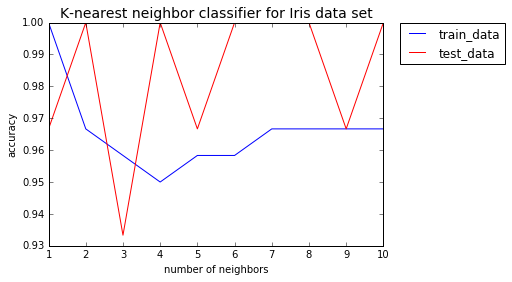

In [420]:
# data_X_train, data_X_test, data_labels_train, data_labels_test 
N_Knearest = 10
from sklearn.neighbors import KNeighborsClassifier
accuracy_train = np.zeros(N_Knearest)
accuracy_test = np.zeros(N_Knearest)
for i in range(N_Knearest):
    neigh = KNeighborsClassifier(n_neighbors = i + 1)
    neigh.fit(data_X_train_scaled, data_labels_train) 
    accuracy_train[i] = neigh.score(data_X_train_scaled, data_labels_train)
    accuracy_test[i] = neigh.score(data_X_test_scaled, data_labels_test)
    
x_index = np.arange(1,11)
plt.plot(x_index, accuracy_train, label='train_data', color = 'b')
plt.plot(x_index, accuracy_test, label='test_data', color = 'red')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
plt.title("K-nearest neighbor classifier for Iris data set", fontsize=14)

# 2) Nearest mean classifier:

Implement nearest mean classifier and report the training and test accuracies. Hint: You will find the following link helpful: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html

In [422]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
nearest_mean = NearestCentroid()
nearest_mean.fit(data_X_train_scaled, data_labels_train) 
accuracy_train_nearestmean = nearest_mean.score(data_X_train_scaled, data_labels_train)
accuracy_test_nearestmean = nearest_mean.score(data_X_test_scaled, data_labels_test)

print 'Nearest mean classifier training accuracy = ',accuracy_train_nearestmean
print 'Nearest mean classifier testing accuracy = ',accuracy_test_nearestmean


Nearest mean classifier training accuracy =  0.866666666667
Nearest mean classifier testing accuracy =  0.9


# 3) Gaussian Naive Bayes:

Implement Gaussian Naive Bayes classifier using scikit-learn. Hint: You will find http://scikit-learn.org/stable/modules/naive_bayes.html helpful.

In [423]:
from sklearn.naive_bayes import GaussianNB
Gaussian_NB = GaussianNB()
data_labels_trainNB = Gaussian_NB.fit(data_X_train_scaled, data_labels_train).predict(data_X_train_scaled)
data_labels_testNB = Gaussian_NB.fit(data_X_test_scaled, data_labels_test).predict(data_X_test_scaled)

trainNB_count = 0
testNB_count = 0
for i in range(data_labels_trainNB.shape[0]):
    if (data_labels_trainNB[i] != data_labels_train[i]):
        trainNB_count = trainNB_count + 1
for j in range(data_labels_testNB.shape[0]):
    if (data_labels_testNB[j] != data_labels_test[j]):
        testNB_count = testNB_count + 1
        
accuracy_trainNB = 1 - trainNB_count /  np.double(data_labels_trainNB.shape[0])
accuracy_testNB = 1 - testNB_count /  np.double(data_labels_testNB.shape[0])

print 'Gaussian Naive Bayes training accuracy = ', accuracy_trainNB
print 'Gaussian Naive Bayes testing accuracy = ', accuracy_testNB

Gaussian Naive Bayes training accuracy =  0.958333333333
Gaussian Naive Bayes testing accuracy =  0.966666666667


# 2-- MNIST Dataset

# 1) K-nearest neighbor classifier:
Implement k-nearest neighbor classifer for MNIST dataset where k = 1, 2, 3 (use the files that were given for HW1). You will use scikit-learn for this part but make sure that the data has the format that scikit-learn expects (training samples are in rows of the training matrix not in columns). Plot training/test accuracy as a function of k. (It takes a while to run this part)  http://scikit-learn.org/stable/modules/generate/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [367]:
train_data = np.load('MNISTcwtrain1000.npy')
train_data = train_data.astype(dtype='uint8')
test_data = np.load('MNISTcwtest100.npy')
test_data = test_data.astype(dtype='uint8')

train_data = train_data.T
test_data = test_data.T

# same as nearest mean classifier
N_MNIST = 10
train_label = np.zeros(train_data.shape[0])
test_label = np.zeros(test_data.shape[0])
for i in range(train_data.shape[0]):
    train_label[i] = i * N_MNIST / train_data.shape[0]
for j in range(test_data.shape[0]):
    test_label[j] = j * N_MNIST / test_data.shape[0]

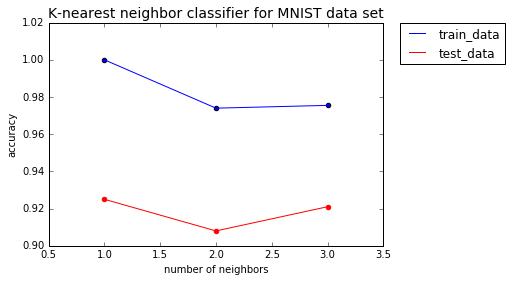

In [425]:
# K nearest neighbour classifier
N_Knearest_MNIST = 3

accuracy_train_MNIST = np.zeros(N_Knearest_MNIST)
accuracy_test_MNIST = np.zeros(N_Knearest_MNIST)

for i in range(N_Knearest_MNIST):
    # use training data to learn, use test data to predict
    neigh_MNIST = KNeighborsClassifier(n_neighbors = i + 1)
    neigh_MNIST.fit(train_data, train_label) 
    accuracy_train_MNIST[i] = neigh_MNIST.score(train_data, train_label)
    # use testing data to train, use training data to predict
    accuracy_test_MNIST[i] = neigh_MNIST.score(test_data, test_label)
    
for i in range(N_Knearest_MNIST):
    plt.scatter(i + 1, accuracy_train_MNIST[i])
    plt.scatter(i + 1, accuracy_test_MNIST[i], color = "r")

x_index_MNIST = np.arange(1,4)
plt.plot(x_index_MNIST, accuracy_train_MNIST, label='train_data', color = 'b')
plt.plot(x_index_MNIST, accuracy_test_MNIST, label='test_data', color = 'red')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
plt.title("K-nearest neighbor classifier for MNIST data set", fontsize=14)

# 2) Nearest centroid classifier:

implement nearest class mean classifier and report the training and test accuracies (using scikit-learn). http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html

In [426]:
nearest_Centroid = NearestCentroid()
nearest_Centroid.fit(train_data,train_label)
accuracy_train_nearestcentroid = nearest_Centroid.score(train_data,train_label)
accuracy_test_nearestcentroid = nearest_Centroid.score(test_data,test_label)
print 'Nearest centroid classifier training accuracy = ',accuracy_train_nearestcentroid
print 'Nearest centroid classifier testing accuracy = ',accuracy_test_nearestcentroid

Nearest centroid classifier training accuracy =  0.8038
Nearest centroid classifier testing accuracy =  0.767


# 3) Gaussian Naive Bayes Classifier:

implement Gaussian naive Bayes classifer and report the training and test accuracies. (http://scikit-learn.org/stable/modules/naive_bayes.html)

In [427]:
GaussianNB_Mnist= GaussianNB()
GaussianNB_Mnist.fit(train_data,train_label)

train_data_NBMnist = GaussianNB_Mnist.predict(train_data)
test_data_NBMnist = GaussianNB_Mnist.predict(test_data)

trainNB_Mnist_count = 0
testNB_Mnist_count = 0

for i in range(train_data.shape[0]):
     if (train_data_NBMnist[i] != train_label[i]):
        trainNB_Mnist_count = trainNB_Mnist_count + 1
        
for j in range(test_data.shape[0]):
     if (test_data_NBMnist[j] != test_label[j]):
        testNB_Mnist_count = testNB_Mnist_count + 1

        
accuracy_trainNB_Mnist = 1 - trainNB_Mnist_count /  np.double(train_data.shape[0])
accuracy_testNB_Mnist = 1 - testNB_Mnist_count /  np.double(test_data.shape[0])

print 'Gaussian Naive Bayes training accuracy = ',accuracy_trainNB_Mnist
print 'Gaussian Naive Bayes testing accuracy = ',accuracy_testNB_Mnist

Gaussian Naive Bayes training accuracy =  0.588
Gaussian Naive Bayes testing accuracy =  0.549


# 4) PCA with scikit-learn:

Project the training data onto the span of first two principal components. Then visualize how the projected data is distributed in two dimensions. Use different colors for different digits.

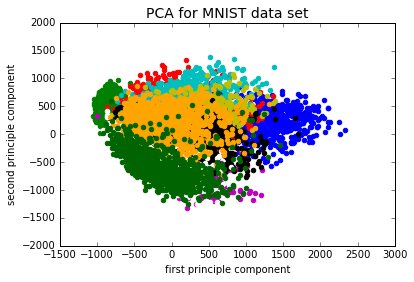

In [428]:
color_MNIST = ["b","g","r","c","m","y","k", "w", "orange", "darkgreen"];
PCA_MNIST2 = PCA(n_components=2)
PCA_MNIST2.fit(train_data)
train_data_PCA_MNIST2 = PCA_MNIST2.transform(train_data)
test_data_PCA_MNIST2 = PCA_MNIST2.transform(test_data)
for i in range(train_data_PCA_MNIST2.shape[0]):
     plt.scatter(train_data_PCA_MNIST2[i][0], train_data_PCA_MNIST2[i][1], color = color_MNIST[i*N_MNIST/train_data_PCA_MNIST2.shape[0]])
        
plt.xlabel("first principle component")
plt.ylabel("second principle component")
plt.title("PCA for MNIST data set", fontsize=14)

# 3 -- Cifar10 Dataset

cifar10 is one of the most widely used datasets for image recognition. It consists of 32*32 color images of 10 different objects ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'). Please take a look at the following page for more information: https://www.cs.toronto.edu/~kriz/cifar.html.
In this part, we are going to use just one subset of the whole dataset. Please download the file ("data_batch_1") from blackboard and impot it to numpy using the following function.

In [429]:
def unpickle(file):
    import cPickle
    fo = open(file,'rb')
    dictionary = cPickle.load(fo)
    fo.close()
    return dictionary

data_batch_1 = unpickle("data_batch_1")
data = data_batch_1['data']
labels = np.asarray(data_batch_1['labels'])
LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
'horse', 'ship', 'truck']

1) Print the dimension of data array. Why is the second dimension different from 32*32?

In [430]:
print 'dimension of data array=', data.shape
# Because the data is color image, each pixel is denote by 3 pixels, so the dimension is 32*32*3 = 3072

dimension of data array= (10000L, 3072L)


2) Plot one image (it can be any of them) from each class using the following function. Make sure that the title of the image is the name of the corresponding object. Hint: You may find np.where command helpful.

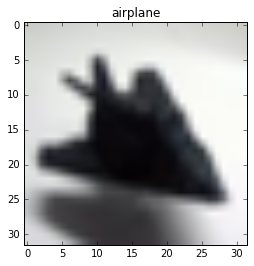

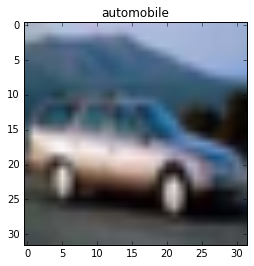

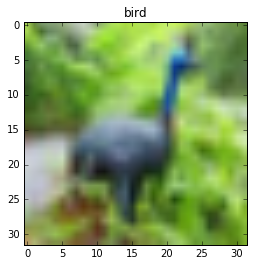

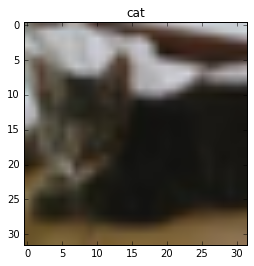

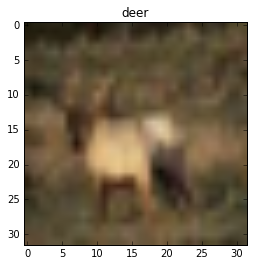

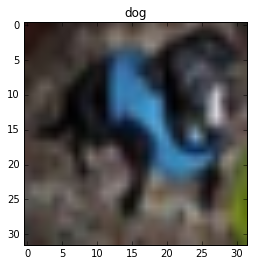

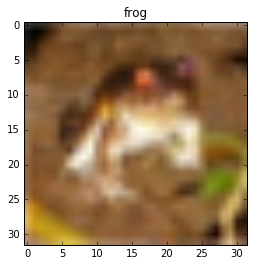

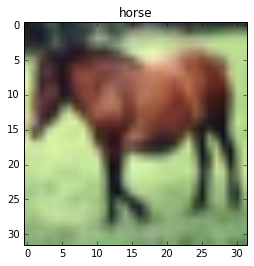

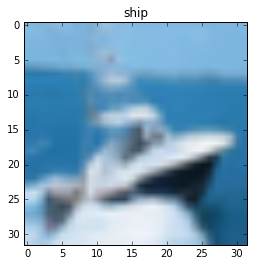

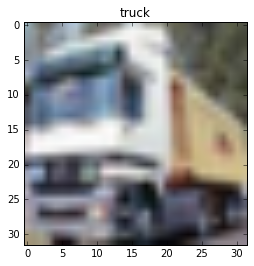

In [431]:
# Function that gets an integer and plots the corrsponding column of the data
def cifar10_show(pic_num):
    im = np.reshape(data[pic_num], (32,32,3), order='F')
    plt.figure()
    plt.imshow(np.transpose(im,(1,0,2)))
    plt.title(LABELS[labels[pic_num]])
    plt.show()

for i in range (10):
    cifar10_show( np.where(labels==i)[0][0])

3) Split the data into 80% training and 20% testing using "train_test"split" command from scikit-learn.

In [432]:
data_Cifar_train, data_Cifar_test, labels_Cifar_train, labels_Cifar_test = train_test_split(data, labels, test_size=0.2, random_state=12)

print 'dimension of training data array=', data_Cifar_train.shape
print 'dimension of testing data array=', data_Cifar_test.shape

dimension of training data array= (8000L, 3072L)
dimension of testing data array= (2000L, 3072L)


# 1) K-nearest neighbor classifier:

Implement k-nearest neighbor classifier for k=1,2. Print the training and test accuracies (it takes a while to run)  (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

In [433]:
neigh1_Cifar =  KNeighborsClassifier(n_neighbors = 1)
neigh1_Cifar.fit(data_Cifar_train,labels_Cifar_train)
accuracy_train_neigh1_Cifar = neigh1_Cifar.score(data_Cifar_train,labels_Cifar_train) 
accuracy_test_neigh1_Cifar = neigh1_Cifar.score(data_Cifar_test,labels_Cifar_test) 

neigh2_Cifar =  KNeighborsClassifier(n_neighbors = 2)
neigh2_Cifar.fit(data_Cifar_train,labels_Cifar_train)
accuracy_train_neigh2_Cifar = neigh2_Cifar.score(data_Cifar_train,labels_Cifar_train) 
accuracy_test_neigh2_Cifar = neigh2_Cifar.score(data_Cifar_test,labels_Cifar_test) 

print "accuracy of 1 nearest neighbour classifier for training data = ", accuracy_train_neigh1_Cifar
print "accuracy of 1 nearest neighbour classifier for testing data = ", accuracy_test_neigh1_Cifar

print "accuracy of 2 nearest neighbour classifier for training data = ", accuracy_train_neigh2_Cifar
print "accuracy of 2 nearest neighbour classifier for testing data = ", accuracy_test_neigh2_Cifar

accuracy of 1 nearest neighbour classifier for training data =  1.0
accuracy of 1 nearest neighbour classifier for testing data =  0.29
accuracy of 2 nearest neighbour classifier for training data =  0.589
accuracy of 2 nearest neighbour classifier for testing data =  0.272


# 2) Nearest centroid classifier:

Implement nearest centroid classifier. What are the training/test accuracies? (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html).

In [434]:
Centroid_Cifar = NearestCentroid()
Centroid_Cifar.fit(data_Cifar_train,labels_Cifar_train)
accuracy_train_Centroid_Cifar = Centroid_Cifar.score(data_Cifar_train,labels_Cifar_train)
accuracy_test_Centroid_Cifar = Centroid_Cifar.score(data_Cifar_test,labels_Cifar_test)
print "accuracy of nearest centroid classifier for training = ", accuracy_train_Centroid_Cifar
print "accuracy of nearest centroid classifier for testing = ", accuracy_test_Centroid_Cifar



accuracy of nearest centroid classifier for training =  0.278875
accuracy of nearest centroid classifier for testing =  0.2635


# 3) Gaussian Naive Bayes classifier:

Implement Gaussian naive Bayes classifier and report the training and test accuracies (http://scikit-learn.org/stable/modules/naive_bayes.html).

In [435]:
GaussianNB_Cifar= GaussianNB()
GaussianNB_Cifar.fit(data_Cifar_train,labels_Cifar_train)

train_labels_Cifar = GaussianNB_Cifar.predict(data_Cifar_train)
test_labels_Cifar = GaussianNB_Cifar.predict(data_Cifar_test)

trainNB_Cifar_count = 0
testNB_Cifar_count = 0

for i in range(data_Cifar_train.shape[0]):
     if (train_labels_Cifar[i] != labels_Cifar_train[i]):
        trainNB_Cifar_count = trainNB_Cifar_count + 1
        
for j in range(data_Cifar_test.shape[0]):
     if (test_labels_Cifar[j] != labels_Cifar_test[j]):
        testNB_Cifar_count = testNB_Cifar_count + 1

        
accuracy_trainNB_Cifar = 1 - trainNB_Cifar_count /  np.double(data_Cifar_train.shape[0])
accuracy_testNB_Cifar = 1 - testNB_Cifar_count /  np.double(data_Cifar_test.shape[0])

print "accuracy of Gaussian naive Bayes classifier for training = ", accuracy_trainNB_Cifar
print "accuracy of Gaussian naive Bayes classifier for testing = ", accuracy_testNB_Cifar

accuracy of Gaussian naive Bayes classifier for training =  0.29275
accuracy of Gaussian naive Bayes classifier for testing =  0.278
